In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt              
import seaborn as sns      

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
df = pd.read_csv("/content/drive/MyDrive/Fall 2021 DSCI560/data_sepTime/64.csv") 
df.columns = ['building', 'location', 'macaddress','latitude','longitude','date','time']

NameError: ignored

In [5]:
df

,Site,Level,ClientMacAddr,lat,lng,date,time
0,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.4604,-0.933048,2020-09-01,23:58:49
1,UK Office,1st Floor,9c:8c:6e:46:0b:7c,51.4608,-0.932288,2020-09-01,23:58:45
2,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.4604,-0.933048,2020-09-01,23:58:38
3,UK Office,1st Floor,9c:8c:6e:46:0b:7c,51.4608,-0.932292,2020-09-01,23:58:35
4,UK Office,1st Floor,9c:8c:6e:46:0b:7c,51.4608,-0.932292,2020-09-01,23:58:29
...,...,...,...,...,...,...,...
3732539,UK Office,1st Floor,9c:8c:6e:46:0b:7c,51.4608,-0.932305,2020-03-22,00:00:15
3732540,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.4604,-0.933039,2020-03-22,00:00:05
3732541,UK Office,1st Floor,c4:6e:1f:1a:68:a1,51.4607,-0.932319,2020-03-22,00:00:04
3732542,UK Office,1st Floor,9c:8c:6e:46:0b:7c,51.4608,-0.932305,2020-03-22,00:00:04


## group by mac address and date

In [7]:
count_addr_bydate = df.groupby(by = ["ClientMacAddr", "date"]).size().reset_index()
count_addr_bydate.columns = ['ClientMacAddr', 'date','count']
count_addr_bydate.sort_values(by = 'count', inplace=True)
count_addr_bydate

,ClientMacAddr,date,count
4869,fc:de:90:84:f8:91,2020-08-28,1
2350,7c:b2:7d:87:e7:45,2020-07-12,1
2348,7c:b2:7d:87:e4:02,2020-06-30,1
2346,7c:b2:7d:87:e0:e2,2020-08-13,1
2344,7c:b2:7d:87:e0:e2,2020-07-22,1
...,...,...,...
3461,9c:8c:6e:46:0b:7c,2020-08-04,8640
3471,9c:8c:6e:46:0b:7c,2020-08-14,8640
3452,9c:8c:6e:46:0b:7c,2020-07-26,8640
3576,9c:8c:6e:46:1c:5e,2020-06-16,8652


In [28]:
count_addr_bydate[(count_addr_bydate['count']<5000)& (count_addr_bydate['count'] > 3)]

,ClientMacAddr,date,count
1558,40:83:de:81:43:54,2020-03-25,4
22,00:08:22:da:bb:fb,2020-07-20,4
3159,98:10:e8:08:63:b2,2020-07-30,4
3161,98:10:e8:08:63:b2,2020-08-12,4
3165,98:10:e8:09:db:7d,2020-07-22,4
...,...,...,...
581,04:ea:56:92:f9:9b,2020-03-26,3424
579,04:ea:56:92:f9:9b,2020-03-24,3907
580,04:ea:56:92:f9:9b,2020-03-25,4006
3440,9c:8c:6e:46:0b:7c,2020-07-14,4659


In [23]:
keep1 = count_addr_bydate[count_addr_bydate['count']<2000] 

ValueError: ignored

In [15]:
keep2 = count_addr_bydate[count_addr_bydate['count']>10]

In [20]:
keep = pd.concat([keep1, keep2])
keep

,ClientMacAddr,date,count
4869,fc:de:90:84:f8:91,2020-08-28,1
2350,7c:b2:7d:87:e7:45,2020-07-12,1
2348,7c:b2:7d:87:e4:02,2020-06-30,1
2346,7c:b2:7d:87:e0:e2,2020-08-13,1
2344,7c:b2:7d:87:e0:e2,2020-07-22,1
...,...,...,...
3461,9c:8c:6e:46:0b:7c,2020-08-04,8640
3471,9c:8c:6e:46:0b:7c,2020-08-14,8640
3452,9c:8c:6e:46:0b:7c,2020-07-26,8640
3576,9c:8c:6e:46:1c:5e,2020-06-16,8652


<BarContainer object of 4870 artists>

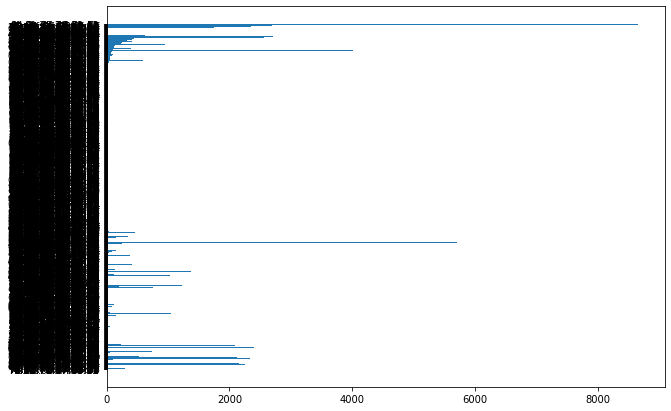

In [10]:
fig = plt.figure(figsize =(10, 7))
plt.barh(count_addr_bydate['ClientMacAddr'], count_addr_bydate['count'])

In [ ]:
# select a specific date
plotspecific_date = count_addr_bydate[count_addr_bydate['date']=='2020-03-22']
plotspecific_date.sort_values(by = "count", inplace = True)

NameError: ignored

<BarContainer object of 11 artists>

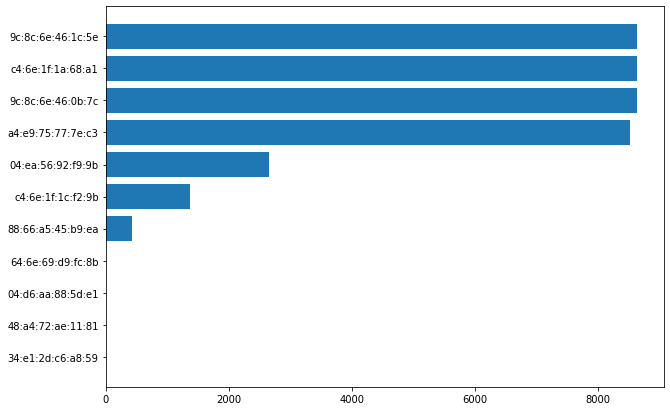

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.barh(plotspecific_date['ClientMacAddr'], plotspecific_date['count'])

# group by mac address and have time, lat, lng in a specific date 2020-03-22

In [ ]:
df_322 = df[df['date']=='2020-03-22']
count_addr_bydatetime = df_322.groupby(by = ["ClientMacAddr", "time","lat", "lng"]).size().reset_index()
count_addr_bydatetime

,ClientMacAddr,time,lat,lng,0
0,04:d6:aa:88:5d:e1,18:35:27,51.460367,-0.932529,1
1,04:d6:aa:88:5d:e1,18:35:36,51.460364,-0.932526,1
2,04:d6:aa:88:5d:e1,18:35:48,51.460367,-0.932525,1
3,04:ea:56:92:f9:9b,00:08:06,51.460367,-0.932527,1
4,04:ea:56:92:f9:9b,00:11:09,51.460364,-0.932528,1
...,...,...,...,...,...
38899,c4:6e:1f:1c:f2:9b,22:44:54,51.460361,-0.932516,1
38900,c4:6e:1f:1c:f2:9b,22:45:06,51.460361,-0.932516,1
38901,c4:6e:1f:1c:f2:9b,22:45:18,51.460361,-0.932516,1
38902,c4:6e:1f:1c:f2:9b,22:45:29,51.460361,-0.932516,1


In [ ]:
count_addr_bydatetime = count_addr_bydatetime[count_addr_bydatetime['ClientMacAddr']== '04:ea:56:92:f9:9b']
count_addr_bydatetime


,ClientMacAddr,time,lat,lng,0
3,04:ea:56:92:f9:9b,00:08:06,51.460367,-0.932527,1
4,04:ea:56:92:f9:9b,00:11:09,51.460364,-0.932528,1
5,04:ea:56:92:f9:9b,00:11:13,51.460357,-0.932506,1
6,04:ea:56:92:f9:9b,00:11:29,51.460357,-0.932506,1
7,04:ea:56:92:f9:9b,00:11:35,51.460357,-0.932506,1
...,...,...,...,...,...
2650,04:ea:56:92:f9:9b,23:59:16,51.460367,-0.932533,1
2651,04:ea:56:92:f9:9b,23:59:26,51.460367,-0.932534,1
2652,04:ea:56:92:f9:9b,23:59:35,51.460367,-0.932534,1
2653,04:ea:56:92:f9:9b,23:59:42,51.460367,-0.932534,1


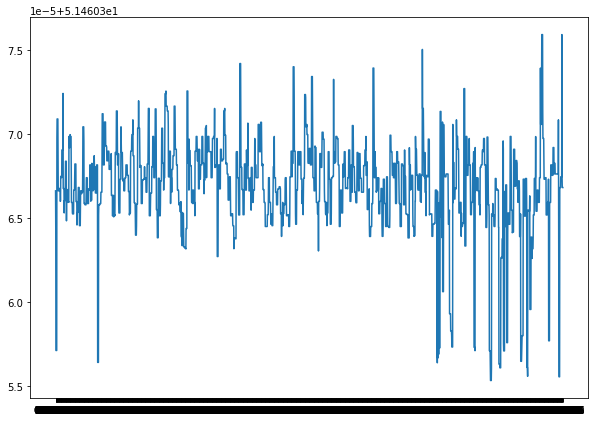

In [ ]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
fig = plt.figure(figsize =(10, 7))
plt.plot(count_addr_bydatetime['time'],count_addr_bydatetime['lat'])
plt.show()

In [ ]:
lat = count_addr_bydatetime['lat'].values
lon = count_addr_bydatetime['lng'].values

In [ ]:
import Basemap
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

ModuleNotFoundError: ignored

# group by mac adrees along and get 

In [ ]:
df_by_addr = df.groupby(by = ["ClientMacAddr"]).size().reset_index()
df_by_addr.columns = ['ClientMacAddr', 'frequnce']
df_by_addr

,ClientMacAddr,frequnce
0,00:08:22:20:bc:fb,24
1,00:08:22:24:bd:fb,4
2,00:08:22:26:bb:fb,18
3,00:08:22:38:bd:fb,18
4,00:08:22:44:bb:fb,2
...,...,...
1388,f8:da:0c:07:43:e7,72
1389,f8:e9:4e:62:b7:89,81
1390,f8:ff:c2:8e:48:d9,6
1391,fc:94:35:23:ee:a5,632
